准备工作

In [25]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

预处理

In [26]:
data = pd.read_excel('D:\\Code\\BP\\GDP.xls', skip_footer = 2, skiprows = [0,1,2,3])
temp1 = data.iloc[:, 0:2]
temp1.iloc[:, 0] = temp1.iloc[:, 0].str.replace('年','')         #将原始数据中“xxxx年”的“年”去掉
temp1.iloc[:, 1] = temp1.iloc[:, 1].str.replace(',','')          #将数字的分隔符去掉
temp2 = temp1.iloc[:, 0:2].astype(float)                         #仅取年份与GDP
temp3 = np.array(temp2)                                          #将 dataframe 转为 array
orig_inputs = np.array(temp3[:,0])
orig_target = np.array(temp3[:,1])

In [27]:
year_max = np.max(orig_inputs)
year_min = np.min(orig_inputs)
inputs = (orig_inputs - year_min)/(year_max - year_min)

target_max = np.max(orig_target)
target_min = np.min(orig_target)
target = (orig_target - target_min)/(target_max - target_min)

eta = 0.9

In [28]:
orig_test = np.arange(1984, 2019)
tests = (orig_test - year_min)/(year_max - year_min)

In [29]:
def init_matrix(n, m):
    """
    用于初始化权系数，取值为（-1，1）的随机数
    """
    matrix = np.empty((n,m))
    for i in range(n):
        for j in range(m):
            matrix[i][j] = np.random.uniform(-1, 1)
    return matrix

In [30]:
def sigmoid(x):
    n = np.shape(x)[0]
    for i in range(n):
        temp = float('inf')
        temp = 1 / (1 + math.exp(-x[i]))
        x[i] = temp
    return x

In [31]:
def cal_out(x1, x2):
    temp = np.dot(x1, x2)
    out = sigmoid(temp)
    return out

In [32]:
def decode(x):
    result = x * (target_max - target_min) + target_min
    return result

In [33]:
def bp(w, v, eta, inputs, target, hid_out, output):
    a, b = np.shape(w)
    c, d = np.shape(v)
    delta_j = []
    new_w = np.empty((a,b))
    new_v = np.empty((c,d))
    
    for j in range(a):
        temp2 = 0
        for k in range(b):
            temp1 = 0
            delta_k = (target[k] - output[k]) * output[k] * (1-output[k])
            new_w[j][k] = w[j][k] + eta * delta_k * hid_out[j]
            temp1 += (delta_k * new_w[j][k])
        temp2 = temp1 * hid_out[j] * (1 - hid_out[j])
        delta_j.append(temp2)
    
    for i in range(c):
        for j in range(d):
            new_v[i][j] = v[i][j] + eta * delta_j[j] * inputs[i]
            
    return new_w, new_v

In [34]:
def train(inputs, target, eta, generation, n_hidden = 6):
    
    n_inputs = np.shape(inputs)[0]
    v = init_matrix(n_inputs, n_hidden)
    w = init_matrix(n_hidden, n_inputs)       #初始化权系数
    
    for i in range(generation):
        hid_out = cal_out(inputs, v)
        output = cal_out(hid_out, w)
        w, v = bp(w, v, eta, inputs, target, hid_out, output)
        result = decode(output)

    return w, v, output, result

In [35]:
def test(w, v, tests):
    t_hid_out = cal_out(tests, v)
    t_output = cal_out(t_hid_out, w)
    t_result = decode(t_output)
    return t_result

In [41]:
generation = 1000
train_w, train_v, output, result = train(inputs, target, eta, generation)
result

array([   343.17962978,    344.02573699,    335.73589373,    340.87528424,
          357.0854897 ,    365.85308108,    404.06685619,    408.71520826,
          443.82048974,    457.6176839 ,    498.13599568,    634.08304617,
          837.47236652,   1126.23482653,   1312.76650969,   1507.75308641,
         1593.47391915,   1662.00740971,   1789.21846964,   1974.11663618,
         2232.799077  ,   2554.55553776,   3033.13755973,   3465.94772091,
         3905.0959386 ,   4673.90374422,   5792.41934941,   6528.21347568,
         7894.91375474,  10012.67487959,  11408.21671469,  12656.80343176,
        14265.29396268,  15717.24810954,  17331.31361675])

In [40]:
t_result = test(train_w, train_v, tests)
t_result[-3:]

array([ 14304.20174169,  15760.85903471,  17321.39378726])

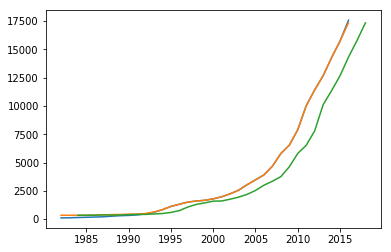

In [43]:
plt.plot(orig_inputs,orig_target)
plt.plot(orig_inputs,result)
plt.plot(orig_test,t_result)

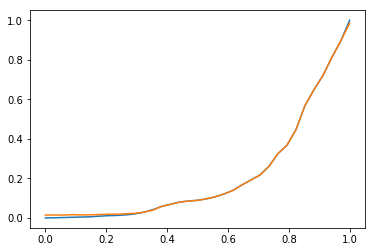

In [38]:
plt.plot(inputs,target)
plt.plot(inputs,output)

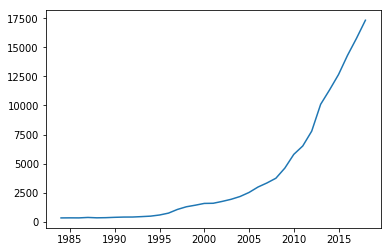

In [44]:
plt.plot(orig_test, t_result)